In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
sns.s

1. For histgram: The "square root rule" is a commonly-used rule of thumb for choosing number of bins: choose the number of bins to be the square root of the number of samples. bins = np.sqrt(len(array))

2. Binning bias: the same data may be interpreted differently depending on the choice of bins.

In [2]:
plt.margins(0.02) # keep data off plot edge

** 1. Emperical cummulative distribution function (ECDF), histgram and swarmplot are good exploratory plots **

In [3]:
tips = sns.load_dataset('tips')
tips.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


In [4]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = 1.00* np.arange(1, n+1) / n

    return x, y

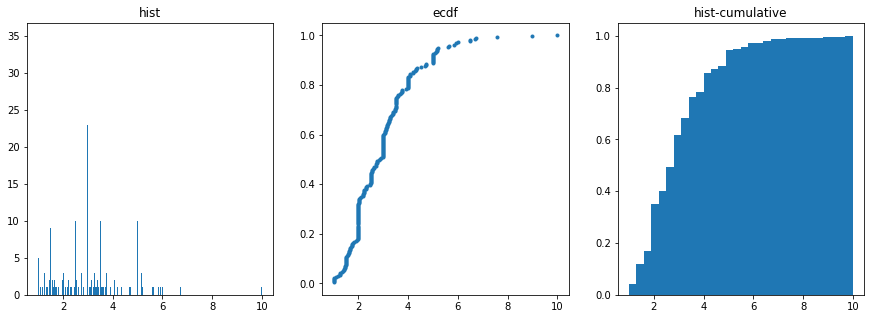

In [6]:

s = tips['tip']

fig,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15,5))
ax1.hist(s, 400)
ax1.set_title('hist')

x, y = ecdf(s)
ax2.plot(x, y, marker = '.', linestyle = 'none')
ax2.set_title('ecdf')

ax3.hist(s, 30, cumulative = True, normed= True)
ax3.set_title('hist-cumulative')

plt.show()

In [ ]:
# get percentile of a data

In [5]:
np.percentile(tips['tip'],[25,50,75,95])

array([ 2.    ,  2.9   ,  3.5625,  5.1955])

In [ ]:
# # Specify array of percentiles: percentiles

# percentiles = [25, 50, 75, 95]
# # Compute percentiles: ptiles_vers
# ptiles_vers = np.percentile(versicolor_petal_length,percentiles)

# # Print the result
# print (ptiles_vers)

# # Plot the ECDF
# _ = plt.plot(x_vers, y_vers, '.')
# _ = plt.xlabel('petal length (cm)')
# _ = plt.ylabel('ECDF')


# # Overlay percentiles as red diamonds.
# _ = plt.plot(ptiles_vers, percentiles/100, marker='D', color='red',linestyle='none')

# # Show the plot

# plt.show()

## 2. Variance| covariance| pearson correlation
 - variance: spread of the data. 
 - standard deviation = sqrt(variance)

In [6]:
# variance
variance = np.var(tips['tip'])
print ('variance: %.2f' %variance)

# standard deviation
sd = np.std(tips['tip'])
sd2 = np.sqrt(np.var(tips['tip']))
print ('sd: %.2f' %sd)
print ('sd2: %.2f' %sd2)

variance: 1.91
sd: 1.38
sd2: 1.38


### covariance
![title](covairance.png)

### pearson correlation
![title](Pearson_correlation.png)

In [ ]:
- covariance is no dimensionless
- pearson correlation is dimensionless.

In [ ]:
# columns = ['listening_hours_free','listening_hours_subs','listeners_free','listeners_subs'
          
#           ,'LH_ratio','listeners_ratio'
#           ]

# total_LH_df[columns].corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

In [9]:
tips.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


> get correlation (-1, 1) for two arrays

In [10]:
x = tips.total_bill
y = tips.tip
np.corrcoef(x, y)
# results[0,1] is pearson_corr

array([[ 1.        ,  0.67573411],
       [ 0.67573411,  1.        ]])

In [15]:
# # if we do correlation calculation manually from covaraince matrix
# covariance_matrix = np.cov(x, y)
# covariance_matrix

## covariance_matrix has dimension

# convariance = covariance_matrix[1,0]
# std_a = np.sqrt(covariance_matrix[0,0])
# std_b = np.sqrt(covariance_matrix[1,1])

# pearson = convariance /std_a/std_b

# print (pearson)

In [16]:
def pearson_corr(x, y):
    """
    return pearson correlation value between x and y
    """
    corr_matrix = np.corrcoef(x, y)
    return corr_matrix[0,1]

## 3. statistical inference

In [31]:
# np.random.seed(1234)

## simulating probability
n = 10000
n_all_heads = 0

for _ in range(n):
    # np.random.random generates numbers between (0, 1)
    heads = np.random.random(size= 4) < 0.5
    n_heads = head.sum() # 3 heads out of 4 ramdom flips
    if n_heads == 4:
        n_all_heads = n_all_heads + 1

print ('probability of all heads out of %d is %.5f' %(n, 1.00* n_all_heads/n))
        

probability of all heads out of 1000000 is 0.00000


In [32]:
n_all_heads 

0

### 4. PMF
- probability mass function (pmf) is a function that gives the probability that a discrete random variable is exactly equal to some value.

### 5. Poisson processes and the Poisson distribution
- poisson process: the timing of next event is completely independent of when the previous event happened.
- Poisson distribution is a limit of the Binomial distribution for rare events. So, the Poisson distribution with arrival rate equal to np approximates a Binomial distribution for n Bernoulli trials with probability p of success (with n large and p small). Importantly, the Poisson distribution is often simpler to work with because it has only one parameter instead of two for the Binomial distribution.
  - for example: natural births in a hospital
  - hits on a website
- exponetial distribution: the waiting time between arrivals of a poison process is expotentially distributed.

### 6. The Exponential distribution
- difference between exponetial distribution and poisson distribution.
https://www.youtube.com/watch?v=Z-8FtjZNlb4

![title](poisson_process.png)

> compare poisson distribution with binomial distribution
    - when n large and p small in binomial distribution, poisson = bionomial

- np.random.bionomial(n, p, size)
- np.random.poisson(lam, size)
- samples = np.random.normal(5, 0.5, size = 10000)
- np.random.exponential(scale, size) ##the scale parameter, scale = 1/lambda

In [48]:
# Draw 10,000 samples out of Poisson distribution: samples_poisson
samples_poisson = np.random.poisson(lam = 10, size = 10000)

# Print the mean and standard deviation
print('Poisson:     ', np.mean(samples_poisson),
                       np.std(samples_poisson))

# Specify values of n and p to consider for Binomial: n, p
n = [20, 100, 1000]
p = [0.5, 0.1, 0.01]


# Draw 10,000 samples for each n,p pair: samples_binomial
for i in range(3):
    samples_binomial = np.random.binomial(n[i],p[i], size = 10000)

    # Print results
    print('n =', n[i], 'Binom:', np.mean(samples_binomial),
                                 np.std(samples_binomial))


('Poisson:     ', 10.025, 3.1758738954813683)
('n =', 20, 'Binom:', 9.9863, 2.2212411643043173)
('n =', 100, 'Binom:', 9.9547000000000008, 3.0402052414269667)
('n =', 1000, 'Binom:', 9.9704999999999995, 3.17707880764705)


In [33]:
samples = np.random.normal(5, 0.5, size = 10000)


In [44]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = 1.00* np.arange(1, n+1) / n

    return x, y


# x, y = ecdf(data)
# plt.plot(x, y, marker = '.', linestyle = 'none')
# plt.xlabel('x label')
# plt.ylabel('ecdf')
# plt.show()


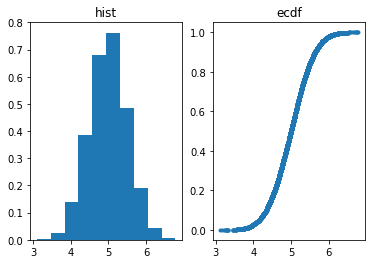

In [45]:
x, y = ecdf(samples)

mean = np.mean(samples)
std = np.std(samples)

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.hist(samples, normed = True)
ax1.set_title('hist')

ax2.plot(x, y, marker = '.', linestyle = 'none')
ax2.set_title('ecdf')
plt.show()

In [41]:
np.arange(1, 5+1) / 5

array([0, 0, 0, 0, 1])

### 7. linear regression fit 

In [ ]:
slope, intercept = np.polyfit(x, y, deg= 1)
print slope
print intercept

### 8. bootstrap

- bootstrappting: The use of resampled data to perform statistical inference
- bootstrap sample: a resampled array
- bootstrap replicate: a stitistic computed from a resampled array

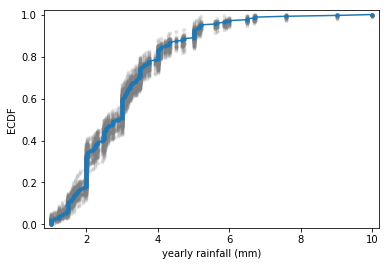

In [49]:
rainfall = tips.tip

for _ in range(50):
    # Generate bootstrap sample 50 times: bs_sample 
    bs_sample = np.random.choice(rainfall, size=len(rainfall))

    # Compute and plot ECDF from bootstrap sample
    x, y = ecdf(bs_sample)
    _ = plt.plot(x, y, marker='.', linestyle='none',
                 color='gray', alpha=0.1)

# Compute and plot ECDF from original data
x, y = ecdf(rainfall)
_ = plt.plot(x, y, marker='.')

# Make margins and label axes
plt.margins(0.02)
_ = plt.xlabel('yearly rainfall (mm)')
_ = plt.ylabel('ECDF')

# Show the plot
plt.show()


In [8]:
## get bootstrap replicates from one data

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)
    
    def bootstrap_replicate_1d(data, func):
        return func(np.random.choice(data, size=len(data)))

    # Generate replicates
    for i in range(size):
        
        bs_replicates[i] = bootstrap_replicate_1d(data, func = func)

    return bs_replicates


0.0883966589499
0.0886724908951
sem of data equals to sd of bs replicates(array of mean of each bs)


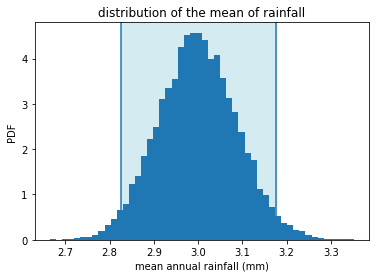

In [9]:
rainfall = tips.tip
# Take 10,000 bootstrap replicates of the mean: bs_replicates
bs_replicates = draw_bs_reps(rainfall, np.mean, size = 10000)

# Compute and print SEM
sem = np.std(rainfall)/ np.sqrt(len(rainfall))
print(sem)

# Compute and print standard deviation of bootstrap replicates
bs_std = np.std(bs_replicates)
print(bs_std)

print ('sem of data equals to sd of bs replicates(array of mean of each bs)')

# get confidence interval of the mean from bs_replicates
x_a , x_b = np.percentile(bs_replicates, [2.5,97.5])

_ = plt.axvline(x_a)
_ = plt.axvline(x_b)

plt.axvspan(x_a, x_b, color = 'lightblue', alpha=0.5)
# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=50, normed=True)
_ = plt.xlabel('mean annual rainfall (mm)')
_ = plt.ylabel('PDF')
_ = plt.title('distribution of the mean of rainfall')

# Show the plot
plt.show()

> pair bootstrap for linear regression: resample data in pairs (x, y)
    - instead of np.random.choice(x), let's bootstrap index to a pair

In [7]:
def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, deg = 1)
    
    # return the list of bs_slope and bs_intercept

    return bs_slope_reps, bs_intercept_reps


In [ ]:
## get bootstrap replicates from pairing bootstrap of two data
def draw_bs_pairs(x, y, func, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_replicate
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_replicates[i]= func(bs_x, bs_y)
    
    # return the list of bs_slope and bs_intercept

    return bs_replicates


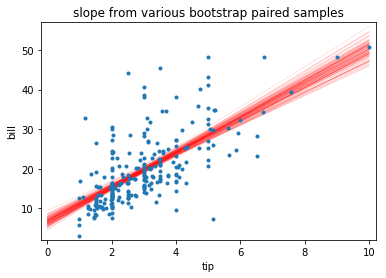

In [64]:

tip = tips.tip
bill = tips.total_bill

bs_slope_reps, bs_intercept_reps = draw_bs_pairs_linreg(tip, bill , size = 100)


# Generate array of x-values for bootstrap lines: x
x = np.array([0,10])

# Plot the bootstrap lines
for i in range(100):
    _ = plt.plot(x, bs_slope_reps[i]*x + bs_intercept_reps[i],
                 linewidth=0.5, alpha=0.2, color='red')

# Plot the data
_ = plt.plot(tip, bill, marker = '.', linestyle = 'none')

# Label axes, set the margins, and show the plot
_ = plt.xlabel('tip')
_ = plt.ylabel('bill')
_ = plt.title('slope from various bootstrap paired samples')
plt.margins(0.02)
plt.show()

## to see two dataset if they are different or not p-value:

In [14]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2


def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1,data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1,perm_sample_2) 
    return perm_replicates



def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff

# Compute difference of mean impact force from experiment: empirical_diff_means
size = tips.shape[0]
force_a = tips.total_bill[:size/2]
force_b = tips.total_bill[size/2:]

empirical_diff_means = diff_of_means(force_a, force_b)

# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(force_a, force_b,
                                 diff_of_means, size=10000)

# Compute p-value: p
p = 1.00* np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)

# Print the result
print('p-value =', p)


('p-value =', 0.5915)


### a pairs permutation test.
  - The heritability of beak depth in G. scandens seems low. It could be that this observed heritability was just achieved by chance and beak depth is actually not really heritable in the species. You will test that hypothesis here. 

In [ ]:
def heritability(parents, offspring):
    """Compute the heritability from parent and offspring samples."""
    covariance_matrix = np.cov(parents, offspring)
    return covariance_matrix[1,0] / covariance_matrix[0,0]


# Initialize array of replicates: perm_replicates
perm_replicates = np.empty(10000)

# Draw replicates
for i in range(10000):
    # Permute parent beak depths
    bd_parent_permuted = np.random.permutation(bd_parent_scandens)
    perm_replicates[i] = heritability(bd_parent_permuted, bd_offspring_scandens)


# Compute p-value: p
p = np.sum(perm_replicates >= heritability_scandens) / len(perm_replicates)

# Print the p-value
print('p-val =', p)


## Simulating Pearson correlation

In [ ]:
# Compute observed correlation: r_obs
r_obs = pearson_r(illiteracy, fertility)

# Initialize permutation replicates: perm_replicates
perm_replicates = np.empty(10000)

# Draw replicates
for _ in range(10000):
    # Permute illiteracy measurments: illiteracy_permuted
    illiteracy_permuted = np.random.permutation(illiteracy)

    # Compute Pearson correlation
    perm_replicates[i] = pearson_r(illiteracy_permuted, fertility)

# Compute p-value: p
p = np.sum(perm_replicates > r_obs)/len(perm_replicates)
print('p-val =', p)

In [ ]:

# Compute the linear regressions
slope_1975, intercept_1975 = np.polyfit(bl_1975, bd_1975, 1)
slope_2012, intercept_2012 = np.polyfit(bl_2012, bd_2012, 1)

# Perform pairs bootstrap for the linear regressions
bs_slope_reps_1975, bs_intercept_reps_1975 = \
        draw_bs_pairs_linreg(bl_1975, bd_1975, 1000)
bs_slope_reps_2012, bs_intercept_reps_2012 = \
        draw_bs_pairs_linreg(bl_2012, bd_2012, 1000)

# Compute confidence intervals of slopes
slope_conf_int_1975 = np.percentile(bs_slope_reps_1975, [2.5, 97.5])
slope_conf_int_2012 = np.percentile(bs_slope_reps_2012, [2.5, 97.5])
intercept_conf_int_1975 = np.percentile(
                            bs_intercept_reps_1975, [2.5, 97.5])
intercept_conf_int_2012 = np.percentile(
                            bs_intercept_reps_2012, [2.5, 97.5])

# Print the results
print('1975: slope =', slope_1975,
      'conf int =', slope_conf_int_1975)
print('1975: intercept =', intercept_1975,
      'conf int =', intercept_conf_int_1975)
print('2012: slope =', slope_2012,
      'conf int =', slope_conf_int_2012)
print('2012: intercept =', intercept_2012,
      'conf int =', intercept_conf_int_2012)